In [93]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap



In [94]:
df = pd.read_json("Datasets/Select+Active+Capital+Projects.json")

In [95]:
df.head()

,Project Name,Civic Association,Division,Budget,Project Status,Project Phase,Project Type
0,AH15 - Aurora Hills Community Senior Center & ...,Aurora Hills,Facilities & Engineering,0.00,Active,Construction,Aurora Hills Complex Interior Renovation
1,AP01 - 8th Road North - Ashlawn School,Bluemont,Transportation & Development Services,"1,369,000.00",Active,Design,Safe Routes To Schools
2,AP01 - 8th Road North - Ashlawn School,Boulevard Manor,Transportation & Development Services,"1,369,000.00",Active,Design,Safe Routes To Schools
3,AP01 - 8th Road North - Ashlawn School,Dominion Hills,Transportation & Development Services,"1,369,000.00",Active,Design,Safe Routes To Schools
4,AP02/AP03 - North Manchester St - Ashlawn School,Bluemont,Transportation & Development Services,"853,560.00",Active,Construction,Safe Routes To Schools


In [96]:
df.describe()

,Budget
count,68.00
mean,"6,903,191.03"
std,"9,150,859.00"
min,0.00
25%,"1,016,919.88"
50%,"3,000,000.00"
75%,"12,630,000.00"
max,"47,860,000.00"


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Project Name       68 non-null     object 
 1   Civic Association  68 non-null     object 
 2   Division           68 non-null     object 
 3   Budget             68 non-null     float64
 4   Project Status     68 non-null     object 
 5   Project Phase      68 non-null     object 
 6   Project Type       68 non-null     object 
dtypes: float64(1), object(6)
memory usage: 3.8+ KB


In [98]:
df.head()

,Project Name,Civic Association,Division,Budget,Project Status,Project Phase,Project Type
0,AH15 - Aurora Hills Community Senior Center & ...,Aurora Hills,Facilities & Engineering,0.00,Active,Construction,Aurora Hills Complex Interior Renovation
1,AP01 - 8th Road North - Ashlawn School,Bluemont,Transportation & Development Services,"1,369,000.00",Active,Design,Safe Routes To Schools
2,AP01 - 8th Road North - Ashlawn School,Boulevard Manor,Transportation & Development Services,"1,369,000.00",Active,Design,Safe Routes To Schools
3,AP01 - 8th Road North - Ashlawn School,Dominion Hills,Transportation & Development Services,"1,369,000.00",Active,Design,Safe Routes To Schools
4,AP02/AP03 - North Manchester St - Ashlawn School,Bluemont,Transportation & Development Services,"853,560.00",Active,Construction,Safe Routes To Schools


In [99]:
pd.options.display.float_format = '{:,.2f}'.format
pt1 = df.pivot_table(
    index = 'Division',
    values= 'Budget',
    aggfunc='sum'
)
pt1

,Budget
Division,
Facilities & Engineering,"71,057,114.00"
Operations,"8,369,227.50"
Sustainability & Environmental Management,"3,852,928.00"
Transportation & Development Services,"386,137,720.51"


In [100]:
def wrapText(texts, letter):
    wrapped_texts = ['\n'.join(wrap(text, letter)) for text in texts]
    return wrapped_texts
def CreateInterval(budget):
    digits =  len(str(budget)) -2
    interval = int("5" + "0" * digits)
    return interval

## Graph1

C:\Users\binch\AppData\Local\Temp\ipykernel_14896\353112218.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapText(pt1.index, 10), rotation=0, ha='center', fontsize=10)


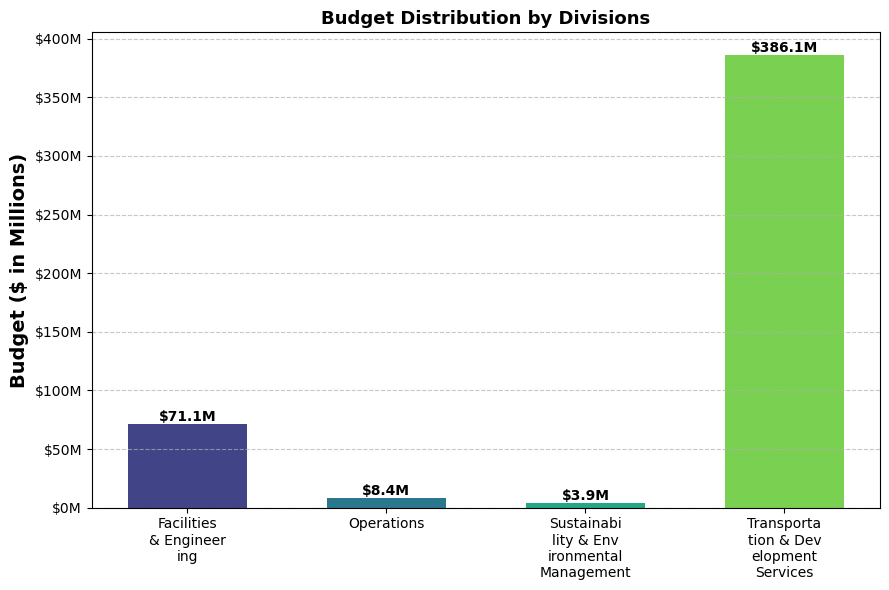

In [111]:
fig, ax = plt.subplots(figsize=(9, 6)) 
bars = ax.bar(pt1.index, pt1['Budget'], color=sns.color_palette("viridis", len(pt1)), width=0.6)

ax.set_xticklabels(wrapText(pt1.index, 10), rotation=0, ha='center', fontsize=10)
ax.set_ylabel("Budget ($ in Millions)", fontsize=14, fontweight='bold')
ax.set_title('Budget Distribution by Divisions', fontsize=13, fontweight='bold')
interval = CreateInterval(round(pt1['Budget'].max()))
y_ticks = list(range(0, int(pt1['Budget'].max()) + interval, interval))
ax.set_yticks(y_ticks)
ax.set_yticklabels(f'${tick / 1_000_000:.0f}M' for tick in y_ticks)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height, f'${height / 1_000_000:.1f}M',
        ha='center',va='bottom',fontsize=10, fontweight='bold', color='black'
    )
plt.tight_layout()



In [102]:
df['Project Type'] = df['Project Type'].replace('0', 'type unspecified')


## Graph2

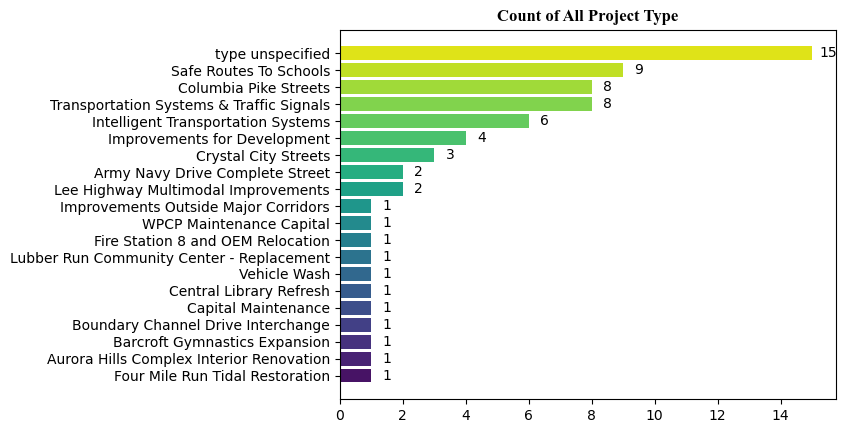

In [103]:
pt2 = df.pivot_table(
    index='Project Type',
    aggfunc='size',
).sort_values()

fig, ax = plt.subplots()
barh = ax.barh(pt2.index,pt2,color = sns.color_palette('viridis',len(pt2)))
ax.set_title("Count of All Project Type", fontsize = 12, fontweight = 'bold', fontname='Times New Roman')

for bar in barh:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(width + 0.5, y, f'{width}', va='center', ha='center', fontsize=10)




## Graph3

C:\Users\binch\AppData\Local\Temp\ipykernel_14896\3757638277.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph3.set_yticklabels(y_ticks_label)


Text(0.5, 1.0, 'Budget by Division and Project Phase')

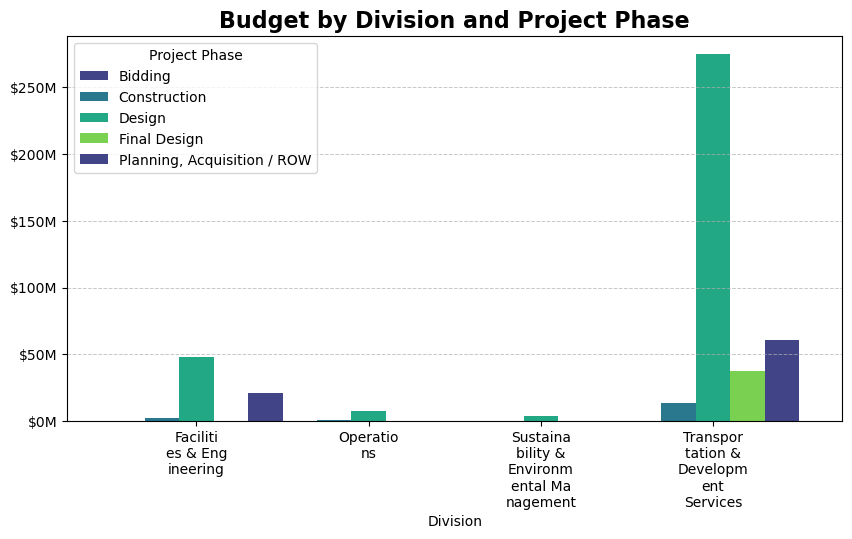

In [104]:
pt3 = df.pivot_table(
    index='Division',
    columns='Project Phase',
    values= 'Budget',
    aggfunc='sum'
)

graph3 = pt3.plot(kind='bar', figsize=(10,5), color= sns.color_palette('viridis', len(pt3.index)), width = 1)

graph3.set_xticklabels(wrapText(pt3.index, 8),rotation =0)
interval = CreateInterval(round(pt3.max().max()))
y_ticks = list(range(0, round(pt3.max().max()) + interval, interval))
y_ticks_label = [f'${tick / 1_000_000:.0f}M' for tick in y_ticks]
graph3.set_yticklabels(y_ticks_label)


plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title('Budget by Division and Project Phase', fontsize = 16, fontweight = 'bold')
